In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime 

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
log_df = pd.read_csv('Dataset/Log/log.csv')
main_pf_df = pd.read_csv("Dataset/main_pf.csv")

In [8]:
# log_df

In [144]:
# main_pf_df.tail() 

In [148]:
tickers = {
    #'Portfolio': 'DIXON.NS',  # Replace with your portfolio ticker/ETF
    'BTC-USD' : ['Bitcoin', "#333"],
    'GC=F' : ['Gold', "#333"],
    '^NSEI' : ['Nifty_50', "#333"],
    '^GSPC' : ['SP500', "#333"],
    # 'NVDA': ['NVIDIA', "#333"],
    'USDINR=X' : ['USDINR', "#333"],
      '^IXIC': ['NASDAQ', "#333"],
        'BRK-B': ['BRK' "#333"],  # USD/INR pair
}

In [ ]:
def cal_cagrs(normalized, main_pf_df):
    cagrs_map = {}
    new_normalized = normalized.copy()
    new_normalized = new_normalized.pct_change().dropna()

    new_main_pf_df = main_pf_df['Pf_Value']
    new_main_pf_df = new_main_pf_df.pct_change().dropna()

    freq = 365 
    years = len(new_normalized) / freq 

    for ticker, (pf_name, _) in tickers.items():  
        
        cagrs = (new_normalized[ticker].add(1).prod() ** (1/years) -1) * 100 

        # print(f"{pf_name} Returns : {cagrs.round(2)} %")
        cagrs_map[ticker] = float(cagrs.round(2))

    cagrs = (new_main_pf_df.add(1).prod() ** (1/years) -1) * 100
    # print(f"My PF Returns : {float(cagrs.round(2))} %")

    cagrs_map['My_pf'] = float(cagrs.round(2))

    return cagrs_map

[*********************100%***********************]  7 of 7 completed


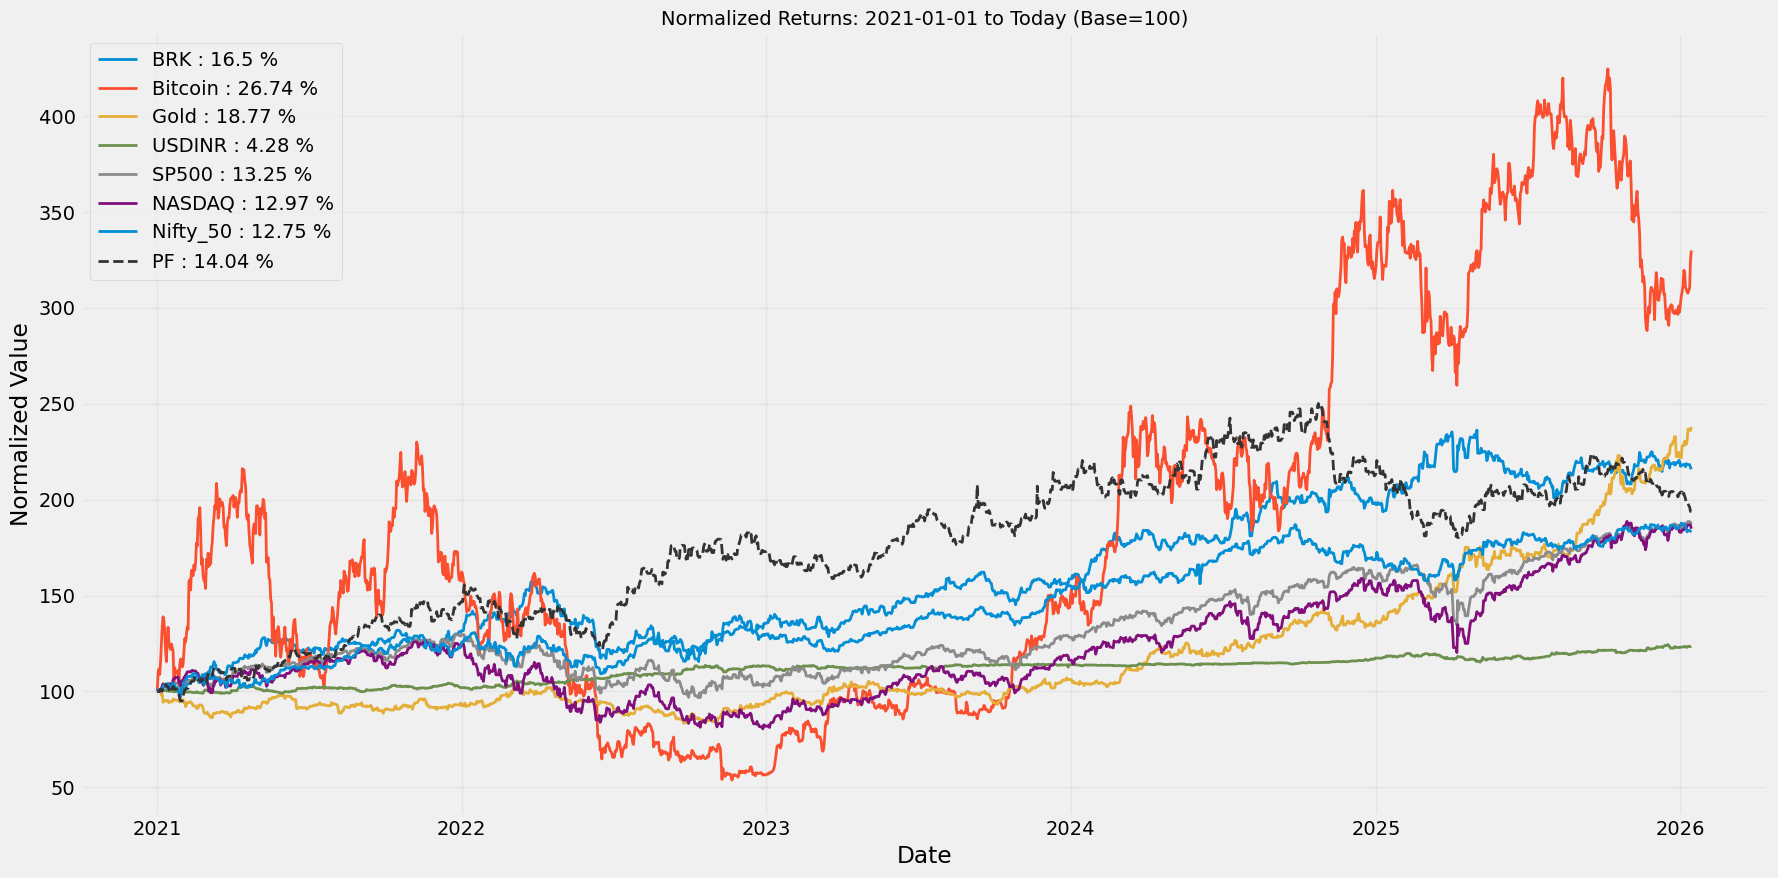

In [147]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Define tickers (use ^NSEI for Nifty50, GC=F for Gold, etc.)

# Note: PPF (India govt scheme) & CPI inflation lack yfinance tickers; 
# use RBI API or manual data for those. CPI.IN exists but is limited [web:11].

start = '2021-01-01'
end = datetime.now().strftime('%Y-%m-%d')


# Download data
data = yf.download(list(tickers.keys()), start=start, end=end, auto_adjust = True)['Close']
# data.columns = list(tickers.keys())  
# print(data.columns)

data_filled = data.ffill()
data_filled = data.bfill()

# Normalize to 100 starting value for return comparison
normalized = (data_filled / data_filled.iloc[0]) * 100


cagr_map = cal_cagrs(normalized, main_pf_df)
# print(cagr_map)

# Plot
plt.figure(figsize=(18, 9))
for col in normalized.columns:
    # print(col)
    plt.plot(normalized.index, normalized[col], label=f"{tickers[col]} : {cagr_map[col]} %", linewidth=2)


plt.plot(normalized.index, main_pf_df['Pf_Value_Pct_100'], label = f"PF : {cagr_map['My_pf']} %", linewidth = 2, linestyle = '--', color = "#333")

plt.title('Normalized Returns: 2021-01-01 to Today (Base=100)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Value')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# CAGR

In [ ]:


cal_cagrs(normalized, main_pf_df)

{'BTC-USD': 26.74,
 'GC=F': 18.77,
 '^NSEI': 12.75,
 '^GSPC': 13.25,
 'USDINR=X': 4.28,
 '^IXIC': 12.97,
 'BRK-B': 16.5,
 'My_pf': 14.04}